In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

We are using "California housing dataset" available by the Scikit-learn package to construct a linear regression model that predicts the price of a house based on all the available features. 




In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
#first we look at the head of the dataframe
cal = fetch_california_housing(as_frame=True)
cal.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
cal.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

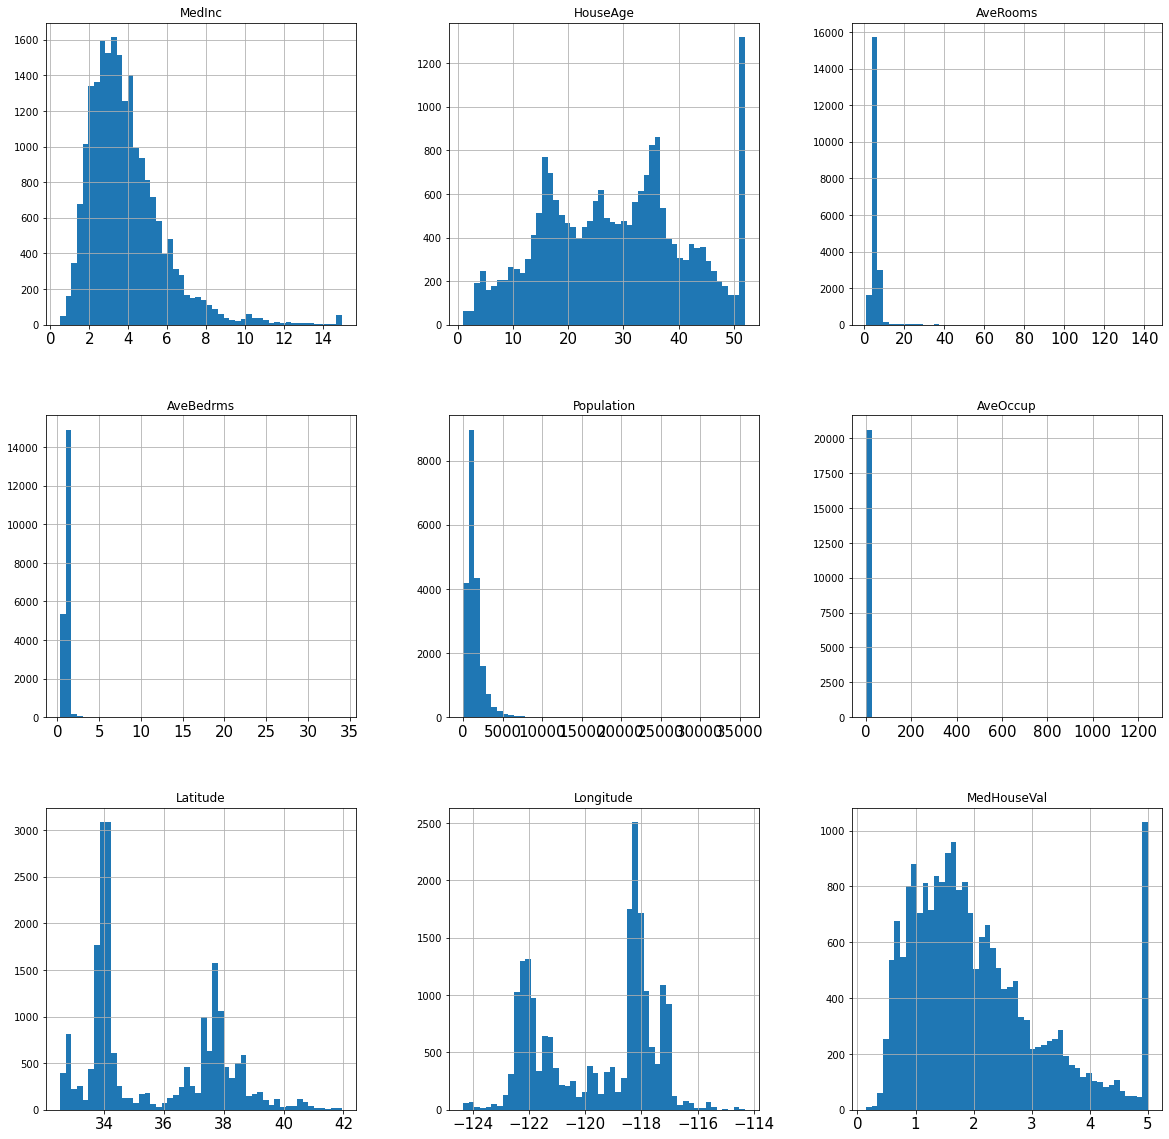

In [13]:
# In this cell we plot the histogram of all the features and the target prices
# Note that there is an upper limit of 5 for the houses with prices higher than this value
cal.frame.hist(figsize=(20,20),bins=50,xlabelsize=15)


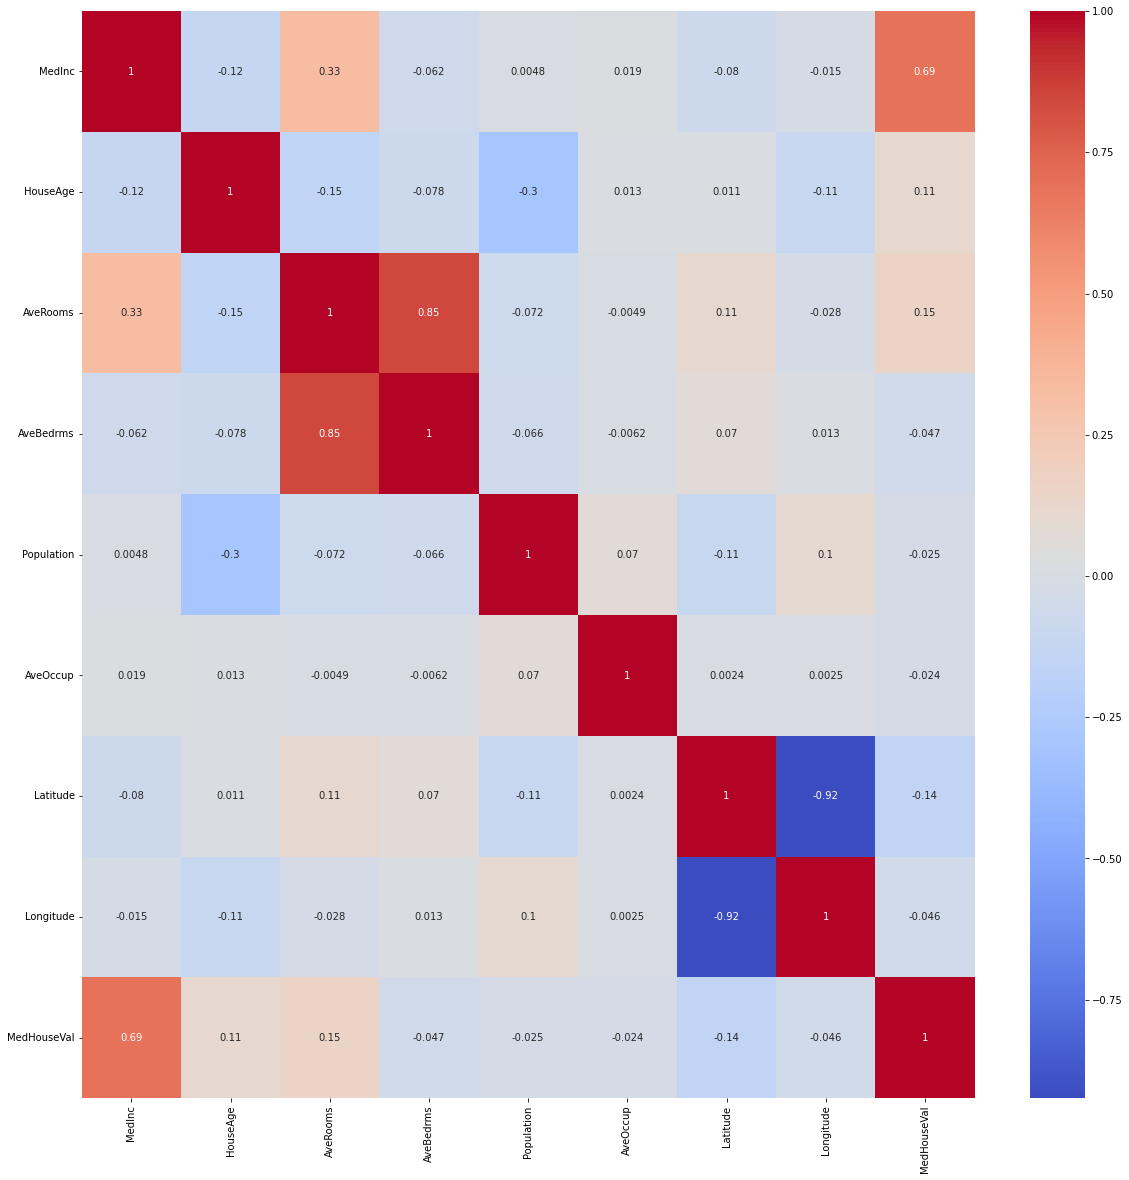

In [74]:
#We can use seaborn heat plot to find which of the features have strong correlation with the price of house
sns.heatmap(cal.frame.corr(),annot=True,cmap='coolwarm')
plt.gcf().set_size_inches(20, 20)

In [14]:
#seprating the features from the target prices. 
X=np.array(cal['data'])
y=np.array(cal['target'])

In [16]:
#using train_test_split from the Scikit-learn package to specify the train and test set
#you can use shift+tab to see the option of this package
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [17]:
#fit the data to a Linear regression model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
Prediction = lin_reg.predict(X_test)
MSE_lin = mean_squared_error(y_test, Prediction)
RMSE_lin = np.sqrt(MSE_lin)
residuals=(y_test-Prediction)
print('Mean-squared-error: {0:3.3f}'.format(MSE_lin))
print('Root-mean-squared-error: {0:3.3f}'.format(RMSE_lin))




Mean-squared-error: 0.500
Root-mean-squared-error: 0.707


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'prediction')

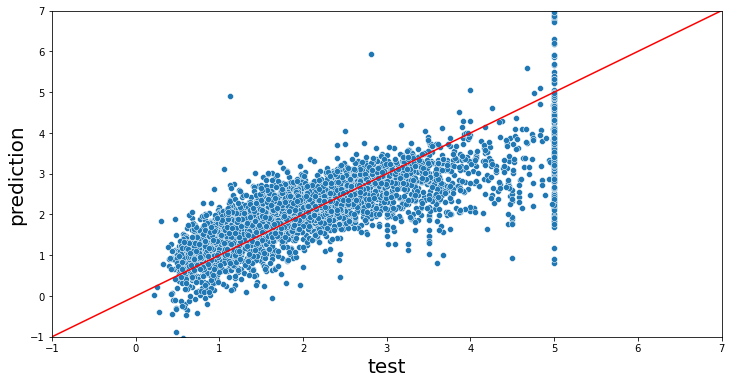

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(y_test,Prediction)
plt.plot(np.arange(-1,10),np.arange(-1,10),color='red')
plt.xlim(-1,7)
plt.ylim(-1,7)
plt.xlabel('test',fontsize=20)
plt.ylabel('prediction',fontsize=20)




/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

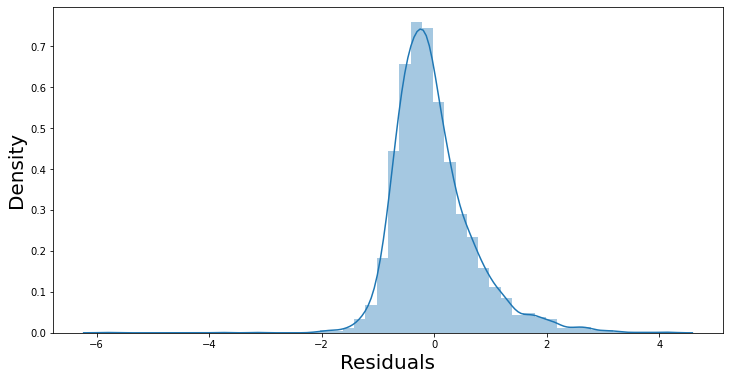

In [48]:
plt.figure(figsize=(12,6))
sns.distplot(residuals)
plt.xlabel('Residuals',fontsize=20)
plt.ylabel('Density',fontsize=20)
